In [ ]:
import os
print("num cpu", os.cpu_count())

num cpu 2


Считываем файл или тянем данные по ссылке и далее процессим данные

удалить пустые / na строки

удалить дубли

строки в которых нет цифр превратить в пустые

удалить записи в промежутке от 1 до 3 часов ночи

Для ускорения выполнения распараллеливайте выполнение этих шагов


# Добрый день, уважаемая команде!

- спасибо большое за тестовое задание, мне  понравилось!
-  Я освежил dask в голове, в основное время я работал со спарком .
- через sql многие моменты быстрее решаю.
- провел тестирование гипотезы
- использовал для эксперемента несколько библиотек для параллели
- вам желаю хорошего дня!

In [ ]:
# # ЭТО КОД ДЛЯ ГЕНЕРаЦИИ ДАННЫЕ С JSON


# import json
# import random
# import string
# import numpy as np
# from datetime import datetime, timedelta

# N = 10000000
# batch_size = 100000
# # Открытие файла для записи
# with open('data7.json', 'w') as f:
#     f.write('[')

#     # Генерация и запись данных пакетами
#     for i in range(0, N, batch_size):
#         # Генерация числовых данных
#         numeric_data = np.random.normal(loc=70, scale=15, size=min(batch_size, N-i)).clip(20, 120)

#         # Генерация дат с учетом часов
#         start_date = datetime(2017, 1, 1)
#         date_data = [start_date + timedelta(days=random.randint(0, 365*3), hours=random.randint(0, 23), minutes=random.randint(0, 59), seconds=random.randint(0, 59)) for _ in range(min(batch_size, N-i))]

#         # Генерация строковых данных
#         string_data = [''.join(random.choices(string.ascii_letters, k=3)) for _ in range(min(batch_size, N-i))]

#         # Создание записей
#         records = [{'numeric': numeric, 'date': date.strftime('%Y-%m-%d %H:%M:%S'), 'string': string}
#                    for numeric, date, string in zip(numeric_data, date_data, string_data)]

#         # Запись в файл
#         if i > 0:
#             f.write(',')
#         f.write(','.join(json.dumps(record) for record in records))

#     # Добавление дублей
#     for i in range(int(N*0.1)):
#         f.write(',')
#         f.write(json.dumps(random.choice(records)))

#     f.write(']')

In [ ]:
# from google.colab import files
# files.download('/content/data7.json')











<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install pandas jupyter pandarallel requests tqdm

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.3 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16673 sha256=ddf556811ef0c657cc6d2c939bab73319f75c7debd6bfda1f69d32e077721060
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


In [ ]:
import pandas as pd
url='https://drive.google.com/file/d/1UY0mzsBLyQ5-NWt7eDrNxbPzBh1VlFIr/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_json(url, convert_dates=['timestamp'])

# удалить пустые / na строки


In [ ]:
# import pandas as pd
from pandarallel import pandarallel

# Инициализация pandarallel
pandarallel.initialize()

def na(df):
    result = df.parallel_apply(lambda column: column.isnull().sum())
    return result


print(na(df))

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
numeric    0
date       0
string     0
dtype: int64


In [ ]:
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

def na(pandasframe):
  result = pandasframe.parallel_apply(lambda column: column.isnull().sum())
  return result

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
print(na(df))

numeric    0
date       0
string     0
dtype: int64


# удалить дубли


In [ ]:
# это дубл для колонок, а я смотрю , для записей

pandarallel.initialize(progress_bar=True)

def duplicates(pandasframe):
  result = pandasframe.parallel_apply(lambda column: column.duplicated().sum())
  print(result)

duplicates(df)

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


numeric    1005
date       1000
string     1349
dtype: int64


In [ ]:
# дубли для записей
df.duplicated().sum()

# pandarallel не поддерживает метод duplicated. Вместо этого, вы можете использовать pandarallel
#  для ускорения других операций, таких как группировка или применение функций к столбцам.



#  def duplicates(df):
#     result = df.parallel_apply(lambda row: df.duplicated(row, keep=False).sum(), axis=1)
#     return result

#   функция duplicates пытается применить функцию duplicated к каждой строке датафрейма,
#   что вызывает ошибку, потому что duplicated ожидает, что вы передадите ему столбцы, а не строки.

# Если вы хотите найти дублированные строки в вашем датафрейме, вы можете использовать метод
#  duplicated напрямую на датафрейме,

1000

In [ ]:
# удаляем дублмированные записи

df = df.drop_duplicates(keep='first')
df.shape

(10000, 3)

# удалить записи в промежутке от 1 до 3 часов ночи


In [ ]:
# df_roll_by3day = rentdf.resample('D', on = 'timestamp').cnt.sum().rolling(window = 3). \
# mean().reset_index()
# series_for_date_resample.resample('D', on='timestamp').cnt.sum()

# Для удаления записей в Pandas по условию в столбце 'date' между 01 и 03 часами ночи,
#   нужно сначала преобразовать столбец 'date' в формат datetime, а затем применить фильтр для удаления строк,
#  удовлетворяющих   условию.




In [ ]:
#  df.date.dt.hour - данные уже в формате datetime  можно обратиться к аттрибуту
 # Фильтрация и удаление строк, где время находится между 01 и 03 часами , через инвертированную Булеву серию [~df['date']...
# df = df[~df['date'].dt.hour.between(1, 3)]

def filter_hour(row):
  return not (1 <=row['date'].hour <=3)



In [ ]:
# df = df.parallel_apply(filter_hour,  axis =1 )
df['date'].dtypes

df['date'] = df['date'].apply(pd.to_datetime, format = '%Y-%m-%d %H:%M:%S')

In [ ]:
pandarallel.initialize(progress_bar=True)

filtered =  df.parallel_apply(filter_hour,axis =1 )
df = df[filtered]

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
df.shape

(8753, 3)

#  Расчет метрик

Агрегация по времени, для каждого часа рассчитать
- кол-во уникальных string
- среднее и медиану для numeric


In [ ]:
"""доп пояснение, я позже, уже в процессе, получил уточняющий ответ от Сергея, поэтому делаю следующим образом:

Ответ - Добрый день, под часом имеется в виду datetime округленный до часа.
Мерж будет между исходным датасетом и датасетом с временем округленным до часа.
Например в исходном датасете в 1 января 2024 в 11:36 метрика была равна 100 мы к ней мержим среднее за период (час) 1 января 2024 11:00 - 12:00.
Соответственно для каждой строки в исходном датасете рядом будет среднее за час.

Ключевое : Например в исходном датасете в 1 января 2024 в 11:36 метрика была равна 100  -   я уже сгенерировал данные, временные метки не поминутные, тогда, с вашего позволения
, я сделаю аналогичным оразом, и просто буду вычислять сренднюю и мендиану для текущего дня. Чтобы соблюсти принцип отношения: среднее и медиана метрик минут за час.
"""

'доп пояснение, я позже, уже в процессе, получил уточняющий ответ от Сергея, поэтому делаю следующим образом:\n\nОтвет - Добрый день, под часом имеется в виду datetime округленный до часа.\nМерж будет между исходным датасетом и датасетом с временем округленным до часа.\nНапример в исходном датасете в 1 января 2024 в 11:36 метрика была равна 100 мы к ней мержим среднее за период (час) 1 января 2024 11:00 - 12:00.\nСоответственно для каждой строки в исходном датасете рядом будет среднее за час.\n\nКлючевое : Например в исходном датасете в 1 января 2024 в 11:36 метрика была равна 100  -   я уже сгенерировал данные, временные метки не поминутные, тогда, с вашего позволения\n, я сделаю аналогичным оразом, и просто буду вычислять сренднюю и мендиану для текущего дня. Чтобы соблюсти принцип отношения: среднее и медиана метрик минут за час.\n'

In [ ]:



"""ранее попробовал, библиотеку pandarallel, но далее, думаю, будет удобно Dask"""



'ранее попробовал, библиотеку pandarallel, но далее, думаю, будет удобно Dask'

In [ ]:
!pip install dask

In [ ]:
import dask.dataframe as dd
ddf = dd.from_pandas(df, npartitions = 10)
ddf = ddf.set_index(ddf.index)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:5242: UserWarning: New index has same name as existing, this is a no-op.
  warnings.warn(


In [ ]:
ddf.dtypes

numeric            float64
date        datetime64[ns]
string     string[pyarrow]
Day                  int32
dtype: object

#STRING

In [ ]:
# 1) группировка по НОМИНАЛЬНОМУ  времени, агрегация  количества уникальных string значений

ddf.groupby(ddf['date'].dt.day)['string'].nunique().compute()

date
1     291
2     272
3     317
4     254
5     311
6     280
7     283
8     266
9     291
10    280
11    284
12    323
13    293
14    314
15    291
16    308
17    296
18    251
19    298
20    314
21    252
22    278
23    282
24    263
25    291
26    301
27    281
28    292
29    240
30    273
31    176
Name: string, dtype: int64

In [ ]:
# тут ресеплировал методов для врменных рядов  и получил занчения для кажого уникальнного временного периода(а не периода месяца, как выше)

# df.resample('H', on = 'date').string.nunique()
# df.resample('D', on = 'date').string.nunique()
ddf.set_index('date').resample('D').nunique().compute()

,numeric,string,Day
date,,,
2017-01-01,9,9,1
2017-01-02,16,16,1
2017-01-03,8,8,1
2017-01-04,5,5,1
2017-01-05,9,9,1
...,...,...,...
2019-12-28,10,10,1
2019-12-29,4,4,1
2019-12-30,6,6,1


#MEAN

In [ ]:
# среднее и медиану для numeric

# df.groupby(df.date.dt.hour).numeric.mean().round(2)



In [ ]:
%reset_selective -f sub, result, result_mean

In [ ]:

# sub = ddf[['date','numeric']]
# # sub['date'] = pd.to_datetime(sub['date'])  #     'date' является datetime?
# sub = sub.set_index('date').compute().sort_index()  #   'date' в качестве индекса
# result = sub.rolling(window='1D')
# result_mean = result.mean()

In [ ]:

sub = ddf[['date','numeric']]

#   'date' в качестве индекса и   переиндексацию для сортировки
sub = sub.set_index('date')
sub = sub.repartition(freq='D')

#   ресемплинг и   среднее значение
sub.resample('D').mean().compute()

,numeric
date,
2017-01-01,68.617015
2017-01-02,70.079285
2017-01-03,67.918701
2017-01-04,74.527949
2017-01-05,65.333828
...,...
2019-12-28,76.364075
2019-12-29,65.363876
2019-12-30,68.264850


In [ ]:
type(ddf)

dask.dataframe.core.DataFrame

In [ ]:


# Так же напишите SQL запрос для выполнения подобных расчетов напрямую в базе данных. Можно его вставить в код в виде комментария.

# В послднее время, я это делал на Спарк sql.

# опять же нужна общая (номинальная) группировка или по уник часам
#  - SELECT DATE_TRUNC('hour', TIMESTAMP '2022-01-12 08:55:30')  Результат: 12/01/22 08:00
#   - where date_part('month', time) = '8'



# df.createOrReplaceTempView('df')
# spark.sql(
# дл  отображение агргеации от уникальных часовых позиций времени

"""
SELECT DATE_PART('hour', CAST("date" AS TIMESTAMP)) AS hour,
       ROUND(AVG(CAST("numeric" AS float))::numeric, 2) AS avg_numeric
FROM simulated_norm_dist snd
GROUP BY DATE_PART('hour', CAST("date" AS TIMESTAMP))
ORDER BY hour DESC
LIMIT 5
"""
# ).show()

'\nSELECT DATE_PART(\'hour\', CAST("date" AS TIMESTAMP)) AS hour,\n       ROUND(AVG(CAST("numeric" AS float))::numeric, 2) AS avg_numeric\nFROM simulated_norm_dist snd\nGROUP BY DATE_PART(\'hour\', CAST("date" AS TIMESTAMP))\nORDER BY hour DESC\nLIMIT 5\n'

# MEDIAN




In [ ]:
# median
sub = ddf[['date','numeric']]

#   'date' в качестве индекса и   переиндексацию для сортировки
sub = sub.set_index('date')
sub = sub.repartition(freq='D')

sub.resample('D').median().compute()



,numeric
date,
2017-01-01,68.939288
2017-01-02,69.597745
2017-01-03,66.591563
2017-01-04,74.984310
2017-01-05,57.067874
...,...
2019-12-28,79.547209
2019-12-29,63.747200
2019-12-30,69.342914


In [ ]:


# Так же напишите SQL запрос для выполнения подобных расчетов напрямую в базе данных. Можно его вставить в код в виде комментария.

  # отображение агргеации от уникальных часовы позиций времени

"""
select date_trunc('hour', cast("date" as TIMESTAMP)) as hour,  ROUND(PERCENTILE_CONT(0.5) within GROUP(order by (cast("numeric" as float)))::numeric,2)
from simulated_norm_dist snd
group by date_trunc('hour', cast("date" as TIMESTAMP))
order by hour desc
limit 10

"""
# ).show()

'\nselect date_trunc(\'hour\', cast("date" as TIMESTAMP)) as hour,  ROUND(PERCENTILE_CONT(0.5) within GROUP(order by (cast("numeric" as float)))::numeric,2)\nfrom simulated_norm_dist snd\ngroup by date_trunc(\'hour\', cast("date" as TIMESTAMP))\norder by hour desc\nlimit 10\n\n'

In [ ]:
%reset_selective -f result, merged, result_median, result_mean

#Мерж с метриками


In [ ]:
result_mean = sub.resample('D').mean()
result_median = sub.resample('D').median()

# Сброс индекс для result, чтобы 'date' стал столбцом, а не индексом
result_mean = result_mean.reset_index()
result_median = result_median.reset_index()

#   'date' обратно в обычный столбец в sub
sub = sub.reset_index()
sub['date'] = sub['date'].dt.floor('D')
# Объедините sub и result по 'date'
# merged = dd.merge(sub, result_mean,how = 'left',  on='date')
# merged = dd.merge(merged, result_median,how = 'left',  on='date')

merged = dd.merge(sub, result_mean[['date', 'numeric' ]], how='left', on='date', suffixes=('', '_mean'))
merged = dd.merge(merged, result_median[['date', 'numeric']], how='left', on='date', suffixes=('', '_median'))

In [ ]:


import dask
# from dask import delayed

# df_metrics = merged.compute()
# df_metrics = df_metrics.drop(columns = 'numeric')
merged = merged.drop( 'numeric', axis =1)
# ddf_metrics = dd.from_pandas(df_metrics, npartitions = 10)
ddf['date_rounded'] = ddf['date'].dt.floor('D')

# merged_df = dd.merge(ddf, ddf_metrics, how='left', left_on='date_rounded', right_on='date')
merged_df = dd.merge(ddf, merged, how='left', left_on='date_rounded', right_on='date')

merged_df = merged_df.drop('date_rounded', axis=1)

In [ ]:
merged_df.compute()

,numeric,date_x,string,Day,date_y,numeric_mean,numeric_median
0,45.913557,2018-12-24 12:24:27,XmH,24,2018-12-24,65.777482,70.93290
1,45.913557,2018-12-24 12:24:27,XmH,24,2018-12-24,65.777482,70.93290
2,45.913557,2018-12-24 12:24:27,XmH,24,2018-12-24,65.777482,70.93290
3,45.913557,2018-12-24 12:24:27,XmH,24,2018-12-24,65.777482,70.93290
4,45.913557,2018-12-24 12:24:27,XmH,24,2018-12-24,65.777482,70.93290
...,...,...,...,...,...,...,...
31,61.195308,2019-12-02 22:12:30,tFL,2,2019-12-02,66.940657,66.79005
32,61.195308,2019-12-02 22:12:30,tFL,2,2019-12-02,66.940657,66.79005
33,61.195308,2019-12-02 22:12:30,tFL,2,2019-12-02,66.940657,66.79005
34,61.195308,2019-12-02 22:12:30,tFL,2,2019-12-02,66.940657,66.79005


In [ ]:
merged_df.drop_duplicates().compute()

,numeric,date_x,string,Day,date_y,numeric_mean,numeric_median
0,45.913557,2018-12-24 12:24:27,XmH,24,2018-12-24,65.777482,70.93290
8,71.522827,2018-12-24 04:59:45,ptF,24,2018-12-24,65.777482,70.93290
16,74.767028,2018-12-24 12:23:18,HPx,24,2018-12-24,65.777482,70.93290
24,70.342974,2018-12-24 15:04:03,Joy,24,2018-12-24,65.777482,70.93290
32,88.813717,2018-12-24 18:15:38,geu,24,2018-12-24,65.777482,70.93290
...,...,...,...,...,...,...,...
6,72.384792,2019-12-02 14:55:42,QEY,2,2019-12-02,66.940657,66.79005
12,54.516286,2019-12-02 07:38:33,ylS,2,2019-12-02,66.940657,66.79005
18,82.528569,2019-12-02 10:09:38,BoG,2,2019-12-02,66.940657,66.79005
24,49.480269,2019-12-02 06:38:26,dvx,2,2019-12-02,66.940657,66.79005


In [ ]:
"""поПРОБОВАЛ пару других СПОСОБЫ, НО УБЕДИТЕЛЬНОЙ ПРОСТОТЫ НЕ ПОЛУЧИЛ, РАЗРЕШУ ЭТО ПОЗЖЕ"""

'поПРОБОВАЛ пару других СПОСОБЫ, НО УБЕДИТЕЛЬНОЙ ПРОСТОТЫ НЕ ПОЛУЧИЛ, РАЗРЕШУ ЭТО ПОЗЖЕ'

#Аналитические метрики
Для колонки numeric по полному датасету построить
Гистограмму
95% доверительный интервал, с комментарием как выбирали методику расчета
#Визуализация
Отрисовать график среднего значения numeric колонки (y) по месяцам (x).
Heatmap по частотности символов в колонке string


Можно рассмотркеть  методы на основе
стандартного отклонения,
 квантилей
  или бутстрэпа.

Это в том числе зависит от характеристики   данных, такие как распределение, наличие выбросов и размер выборки, чтобы определить наиболее подходящий метод.



In [ ]:
  # 1) тип шкалы numeric у нас непрерывный
#  2) можно посмотреть визуальное рапсределение
# 3)    смотрю соотввествие рапсределнию, потом выберу статистику и тип ДИ, который соотвествует допущениям

<Axes: ylabel='numeric'>

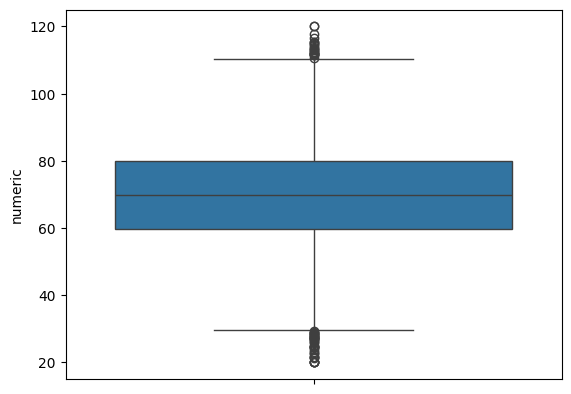

In [ ]:
import seaborn as sns

sns.boxplot(df.numeric)

# есть выбросы, в целом не скошенное, можно проверить на нормальность рапсредления, откуда соотвествуя допущениям, можно ДИ построить

In [ ]:
!pip install fitter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 35.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


2024-04-22 13:32:08.311 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.000152)
2024-04-22 13:32:08.326 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.000152)
2024-04-22 13:32:08.460 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.000151)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.000151,1104.895048,1126.126503,inf,0.006908,0.795038
lognorm,0.000152,1104.892434,1126.123890,inf,0.006888,0.797952
norm,0.000152,1102.892827,1117.047131,inf,0.006888,0.797929


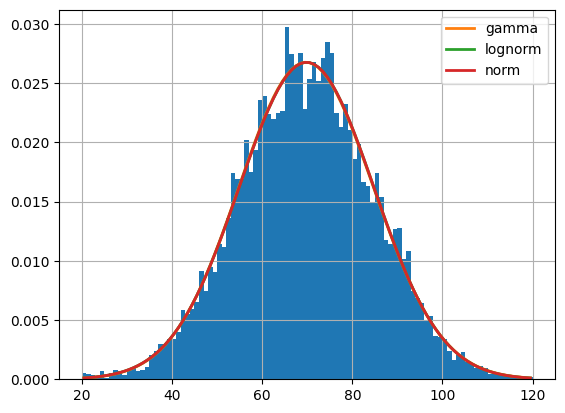

In [ ]:
# в статье наткнулся на интересный инструмент, через него можно автомаом подгонять и сравнивать формы рапсределени яданных с учетом имющихся

from fitter import Fitter
f = Fitter(df.numeric,
           distributions=['gamma',
                          'lognorm',
                             "norm"])
f.fit()
f.summary()

In [ ]:
# Оценка распределения данных
import fitter
f = fitter.Fitter(df.numeric, distributions= fitter.get_common_distributions())
f.fit()

# Вывод результатов
# print(f.get_best())

2024-04-22 13:32:09.063 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.001604)
2024-04-22 13:32:09.075 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.013423)
2024-04-22 13:32:09.784 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.000177)
2024-04-22 13:32:10.135 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.000151)
2024-04-22 13:32:10.186 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.000152)
2024-04-22 13:32:10.197 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.000152)
2024-04-22 13:32:10.219 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.000835)
2024-04-22 13:32:10.241 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayl

In [ ]:
# раз данные похожи на нормальные, оценим еще тестом
from scipy import stats
x = df.numeric.sample(1000, random_state=17)

shapiro_test = stats.shapiro(x )
print(shapiro_test)

# Нулевая гипотеза H0 теста Шапиро–Уилка заключается в том, что случай- ная величина, выборка x которой известна, распределена по нормальному закону, наши результат говорят о недостаточности
# отклонить 0  гипотезу


ShapiroResult(statistic=0.9975520372390747, pvalue=0.14107175171375275)


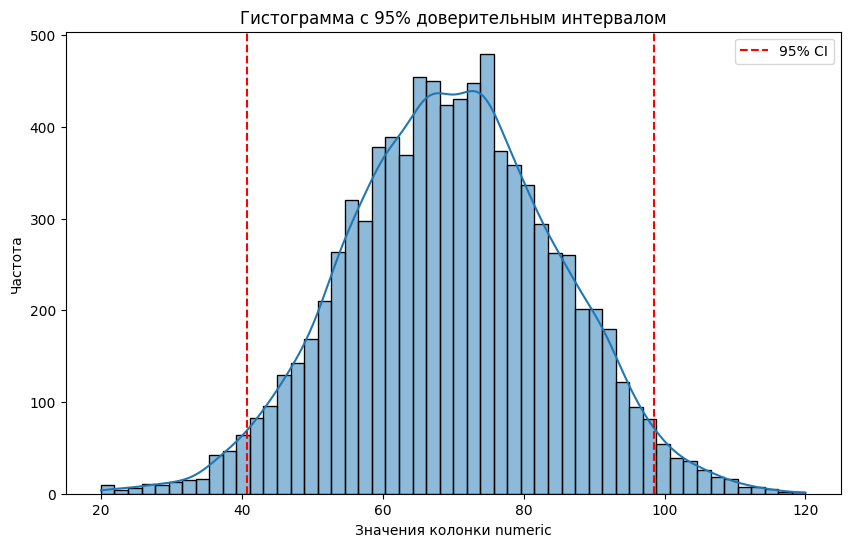

In [ ]:
#  если предполодить, что наши данные есть Генеральная совокупность,  то построить ДИ можно через Z преобразование, ну или для упрощения просто указать инревалы квантилей
import matplotlib.pyplot as plt

lower_bound = df['numeric'].quantile(0.025)
upper_bound = df['numeric'].quantile(0.975)

plt.figure(figsize=(10, 6))
sns.histplot(df['numeric'], kde=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='95% CI')
plt.axvline(upper_bound, color='red', linestyle='--')
plt.legend()
plt.title('Гистограмма с 95% доверительным интервалом')
plt.xlabel('Значения колонки numeric')
plt.ylabel('Частота')
plt.show()

<ipython-input-47-c83aa66a251e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist = True, kde = True,


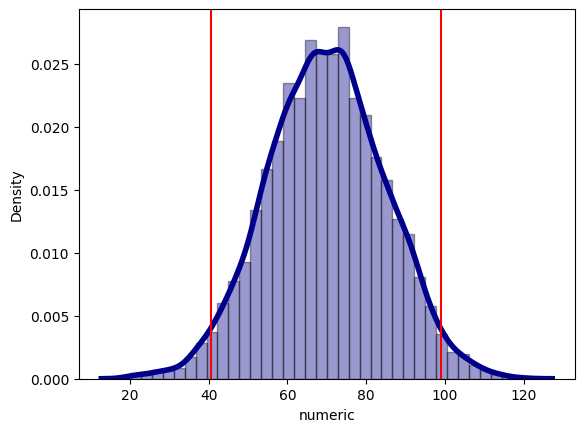

In [ ]:
data = df['numeric']

fig, ax = plt.subplots()

# построение гистограммы
sns.distplot(data, hist = True, kde = True,
             bins = int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=ax)

# расчет 95% доверительного интервала
ci = stats.norm.interval(0.95, np.mean(data), np.std(data))

# добавление линий доверительного интервала на график
ax.axvline(ci[0], color='red')
ax.axvline(ci[1], color='red')

plt.show()

# Визуализация

1) Отрисовать график среднего значения numeric колонки (y) по месяцам (x).\
2) Heatmap по частотности символов в колонке string


<Axes: >

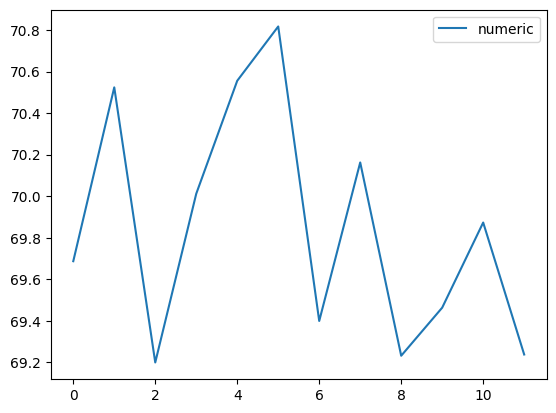

In [ ]:
#  1) Отрисовать график среднего значения numeric колонки (y) по месяцам (x).\

df.dtypes

# А)график по "Номинальным месяцам"
import seaborn as sns

sns.lineplot(  df.groupby(df.date.dt.month, as_index = False).numeric.mean())

<Axes: xlabel='date', ylabel='numeric'>

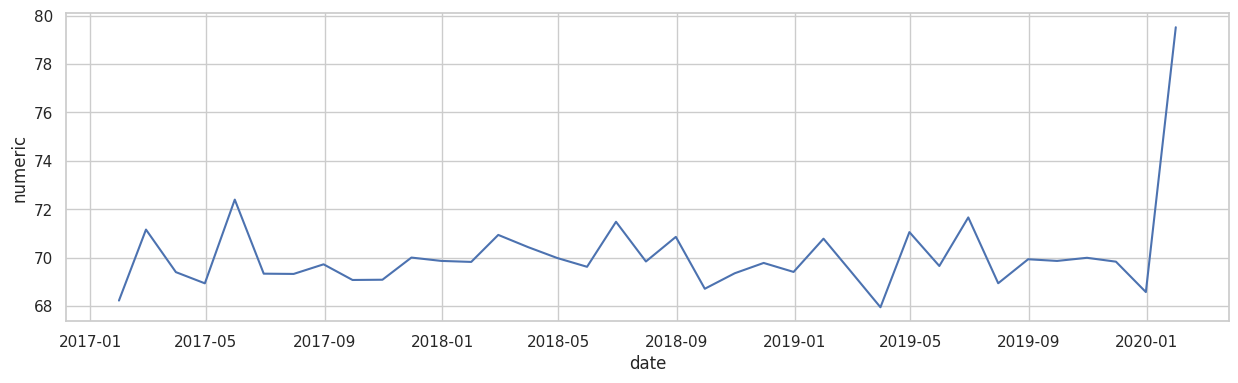

In [ ]:
# Б) график по колендарныму месяцам(году)


sns.set(rc={'figure.figsize':(15,4)}, style = "whitegrid")
sns.lineplot(df.set_index('date').resample('M').numeric.mean())

In [ ]:
# Heatmap по частотности символов в колонке string

# как я понял, предлагается посмотреть частоту возникновения символов в колонке.
# посомтрю вне зависимости от регистра
# df.groupby('string', as_index = False).count()

# df.string.str.lower().value_counts()
the_list = ''.join(df.string.str.lower())





In [ ]:
#расчет через Counter
from collections import Counter
print(Counter(the_list).elements)




<bound method Counter.elements of Counter({'s': 1071, 'g': 1046, 'y': 1044, 'f': 1040, 'k': 1038, 'w': 1037, 'd': 1028, 'i': 1026, 'a': 1025, 'b': 1025, 'q': 1024, 'e': 1023, 'n': 1021, 'l': 1019, 'o': 1011, 'c': 1007, 'p': 1006, 'm': 987, 'j': 986, 'z': 986, 'x': 974, 'v': 973, 't': 972, 'h': 972, 'u': 964, 'r': 954})>


In [ ]:
# sns.heatmap(x = Counter(the_list).keys(), y = Counter(the_list).values())

In [ ]:
type(Counter(the_list))
print(Counter(the_list).keys())
heat = pd.DataFrame({'letter':list(Counter(the_list).keys()), 'freq':[Counter(the_list)[key] for key in Counter(the_list).keys()]})
heat

dict_keys(['y', 'v', 'n', 'e', 'u', 'j', 'l', 'k', 'a', 'z', 't', 'm', 'o', 'f', 'b', 'w', 's', 'h', 'i', 'g', 'd', 'c', 'r', 'x', 'q', 'p'])


,letter,freq
0,y,1044
1,v,973
2,n,1021
3,e,1023
4,u,964
5,j,986
6,l,1019
7,k,1038
8,a,1025
9,z,986


<Axes: ylabel='letter'>

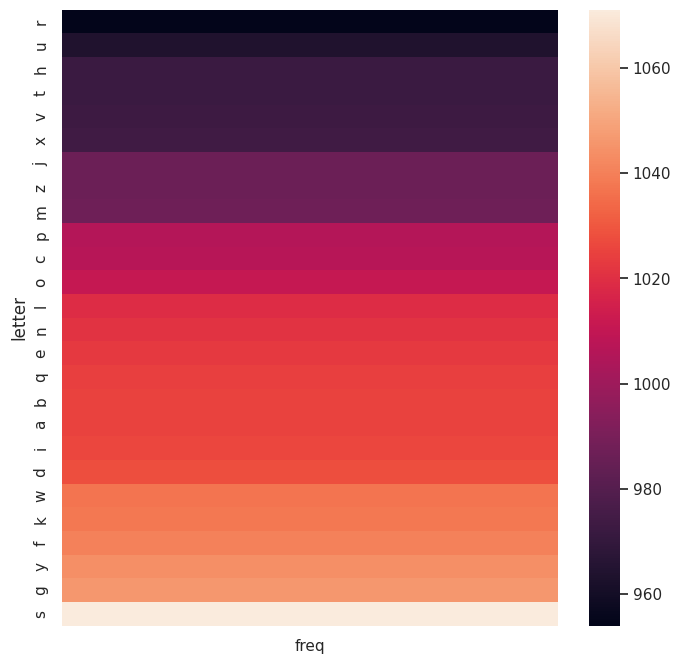

In [ ]:
#2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, the !!index!!/column information will be used to label the columns and rows
sns.set(rc={'figure.figsize':(8,8)}, style = "whitegrid")

sns.heatmap(heat.set_index('letter').sort_values('freq'))

#Доп. задание
 - Случайно поделить датасет на 3 части - в одной 25% записей, во второй 25% и 50% в третьей. (сделай частотным образом, в одну из групп добавь эффект)

- Проверить на статистическую значимость различий для среднего по колонке numeric

- Оценить силу эффекта

- Проделать шаги 2 и 3 используя баесовский подход
Кратко описать как выбирали методы расчета


1) Случайно поделить датасет на 3 части - в одной 25% записей, во второй 25% и 50% в третьей. (сделай частотным образом, в одну из групп добавь эффект)

In [ ]:
# А) ХэШ ДЛЯ РАЗБИЕНИЯ НА ГРУППЫ



# хэш с солью для эффективности и воспроизводимости
# более устойчивый идентификатор - зареганные пользователи.  Здесь сделаем вид, что зареганные пользователи есть в колонке user_id
# сдлеаю скошенное рапсрделние занчений, более похоже на реальные случаи

import hashlib

def ab_split(user_id, salt='exp_mess_1', n_groups=4):
	test_id = str(user_id) + '-' + str(salt)
	test_id_digest = hashlib.md5(test_id.encode('ascii')).hexdigest()
	test_id_final_int = int(test_id_digest, 16)
	return test_id_final_int % n_groups


In [ ]:
who_ls

[]

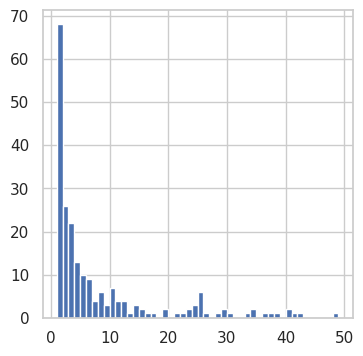

In [ ]:

# Б) СОЗДАЮ ПОХОЖЕЕ НА РЕАЛЬНОЕ РАПСРЕПРДЕЛНИЕ ЧАСТОТЫ ПОЯВЛЕНИЯ ЗАРЕГЕСТРИРОВАННЫХ ПОЛЬЗОВАТЕЛЕЙ



# zipf используем для симуляции user_id
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.zipf.html
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(4,4)}, style = "whitegrid")
# Генерируем значения
user_ids = np.random.zipf(1.3, 300)

# Подсчитываем частоту каждого user_id
frequency = np.bincount(user_ids)

# Выводим график
plt.hist(user_ids, bins=range(1, 50))
plt.show()

In [ ]:
# %reset_selective -f user_ids

In [ ]:
np.random.seed(42)
df['user_ids'] = np.random.zipf(1.3, df.shape[0])

In [ ]:
# df.drop(columns = 'user_ids')
df.tail(7)

,numeric,date,string,user_ids
9993,48.504669,2018-09-15 07:22:26,TkB,454
9994,75.444611,2018-10-28 13:40:27,cUD,2279
9995,62.276358,2018-01-14 17:59:39,xlW,1
9996,77.966282,2018-11-01 16:14:04,dft,3
9997,114.905828,2017-02-03 17:51:38,DRA,3
9998,82.624021,2017-05-24 12:07:45,qfG,2
9999,70.008205,2018-12-22 19:46:10,IBr,31480539


In [ ]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=ff9ea06d1d68477fd33f162d84e8e930810229c9f8cf231f77cdf7806fad180f
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
# df_id = pd.DataFrame( {'id': df['user_ids']})


In [ ]:
import swifter
# df_id['hash'] = df_id.id.swifter.apply(ab_split)
df['hash'] = df.user_ids.swifter.apply(ab_split)

Pandas Apply:   0%|          | 0/8753 [00:00<?, ?it/s]

In [ ]:
# df = df.drop(columns        = 'solt')
df.head()

,numeric,date,string,user_ids,hash
0,24.548614,2017-11-29 22:22:43,YVN,80,0
2,65.869208,2018-02-19 05:41:20,EVU,1,0
3,84.646492,2017-01-06 18:09:59,jvJ,1,0
4,52.355329,2018-07-27 00:53:58,lkA,1,0
5,78.713298,2018-06-12 18:53:05,ZTM,385,2


In [ ]:
# для дальнейшего расчета, снова обращаю к dask

import dask.dataframe as dd
ddf = dd.from_pandas(df, npartitions = 10)
ddf = ddf.set_index(ddf.index)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:5242: UserWarning: New index has same name as existing, this is a no-op.
  warnings.warn(


In [ ]:
ddf.groupby('hash').string.count().compute()
# вижу что группа 2 и3 более равномерна, для 3й группы в 50% объединю 0 и 1

hash
0    3073
1    1166
2    2116
3    2398
Name: string, dtype: int64

In [ ]:
ddf.dtypes

numeric             float64
date         datetime64[ns]
string      string[pyarrow]
user_ids              int64
hash                  int64
dtype: object

In [ ]:
ddf['hash'] = ddf['hash'].replace(1,0).compute()

In [ ]:
ddf.groupby('hash').string.count().compute()
# проверка

hash
0    4239
2    2116
3    2398
Name: string, dtype: int64

In [ ]:
# В) В ОДНУ ГРУППУ ДОАВИТЬ ЭФФЕКТ


# добавлю смещение среднего (можно медианы или квантиля)  во группу hash2

In [ ]:
ddf.groupby('hash').numeric.mean().compute()

hash
0    69.640192
2    69.930390
3    70.139962
Name: numeric, dtype: float64

In [ ]:
#  предположи что наш минимальный уровень значимости измненйи mde   будет 1,5 единицы, добавлю +2 единины ко 2й группе
# № можно  добавить норм рапсредление со средним 2, но просто добавлю скаляр.



# def add_scalar(column):
#   return column+2
# ddf['numeric'] = ddf.query('hash ==2 ').numeric.map_partitions(add_scalar) ха, получи nan для объектов daskDF вне фильтра, меняем стратегию на смену занечения по условию

ddf['numeric'] = ddf['numeric'].where(ddf['hash']!= 2, ddf['numeric']+2)


In [ ]:
# %reset_selective -f ddf

In [ ]:
#проверка
ddf.groupby('hash').numeric.mean().compute()

hash
0    69.640192
2    71.930390
3    70.139962
Name: numeric, dtype: float64

2)   Проверить на статистическую значимость различий для среднего по колонке numeric

In [ ]:
# 2) раз были взяты средние, есть несколько групп, да и рапсредение близко к номральному,
# -попробуем использовать Тьюки  для множественного сравнения,
# -  с поправками
#  - и контролем случайного прокраса

ANOVA


- Значение F в дисперсионном анализе

Значение F в одном аспекте ANOVA — это инструмент, который поможет вам ответить на вопрос « Существенно ли различается дисперсия между средними значениями двух совокупностей ?» Значение F в тесте ANOVA также определяет значение P ; Значение P — это вероятность получения результата, по крайней мере столь же экстремального, как тот, который фактически наблюдался, при условии, что нулевая гипотеза верна.

https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/#:~:text=The%20F%20value%20in%20regression,model%20has%20no%20predictive%20capability

- ОДнако мы захотим посмотреть в какой именно группе появилось отличие, это гипотеза anova нам не скажет, тогда возьмем Тьюки.

... В  формулы стандартной ошибки входит внутригрупповая дисперсия
 , так обеспечивается контроль над групповой вероятностью ошибки первого рода. Именно это делает критерий Тьюки  подходящим критерием для выполнения большого числа попарных сравнений групповых средних.


https://www.statology.org/tukey-test-python/
      


In [ ]:
# Для критерия Тьюки необходимо, чтобы дисперсии s_j^2 всех выборок были статистически неразличимы.

# смотрим на гомогенность . Если бы это была метрика отнощения, то знаечния могли бы быть зависимыми и лучше было бы применить Дельта метод или Бустрап



формула критерия Тьюки

$q = \frac{|Y_{a} - Y_{b}|}{SE}$

$SE =  \sqrt{\frac{MS_{w}}{n}}$
где Y A и Y B — два сравниваемых средних значения, а SE — стандартная ошибка суммы средних значений. Значение q s представляет собой тестовую статистику выборки.

 нулевая гипотеза для теста Тьюки утверждает , что все сравниваемые средние относятся к одной и той же совокупности ( т.е. ) с тем же стандартным отклонением модели σ , оцененным с помощью !!!объединенной стандартной ошибки!!  (в случае гомогенности)


Приведенная формула для критерия Тьюки верна для случаев, когда все сравниваемые группы содержат одинаковое число наблюдений, n. Если сравниваемые группы неодинаковы по размеру, стандартная ошибка будет рассчитываться следующим образом:

$q = \frac{|Y_{a} - Y_{b}|}{SE}$

$SE =  \sqrt{\frac{MS_{w}}{2} * (\frac{1}{n_{a}} +\frac{1}{n_{b}})}$

ДОПУЩЕНИЯ
 - данные наши близки к нормльаным
 - гомогенность дисперсий сейчас проверим
 - одинаковость количества наблюдений

 Также обратите внимание, что размеры выборки должны быть равными при использовании подхода, ориентированного на учащихся.     стандартное отклонение всего дизайна, а не только двух сравниваемых групп. Возможно работать с неравными размерами выборки. В этом случае необходимо рассчитать оценочное стандартное отклонение для каждого попарного сравнения, формализованное Клайдом Крамером в 1956 году, поэтому процедуру для неравных размеров выборки иногда называют методом Тьюки–Крамера


 # гомогенность

In [ ]:
#критерий Левена
# The Levene test tests the null hypothesis that all input samples are from populations with equal variances.


from scipy import stats



statistic, p_value = stats.levene(ddf.query('hash ==0 ').numeric, ddf.query('hash ==2 ').numeric, ddf.query('hash ==3 ').numeric)

if p_value < 0.05:
    print("Дисперсии между группами статистически значимо различаются (p-value < 0.05)")
else:
    print("Дисперсии между группами не различаются (p-value >= 0.05)")

Дисперсии между группами не различаются (p-value >= 0.05)


In [ ]:
# оценка размера группы

# оценка размера группы

In [ ]:
# но раз нас просят оценить эффект и допущения позволяют оперерировать нормльным рапсределнием, посчитаем колличесво наблюдений в группах для
# дополнителной оценки силы эффекта  относительно предполагаемого mde

def p1method(alpha , beta , std, effect ):
    t_alpha = stats.norm.ppf(1 - alpha / 2, loc=0, scale=1)
    t_beta = stats.norm.ppf(1 - beta, loc=0, scale=1)
    var = 2 * std ** 2
    # ИЛИ var = std1*std2
    #nonlocal sample_size1
    sample_size1 = int((t_alpha + t_beta) ** 2 * var / (effect ** 2))
    return sample_size1

In [ ]:
std_group = np.std(ddf.query('hash ==2').numeric)

p1method(0.05, 0.2,std_group, 1.5)


1552

# расчет критерия

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [ ]:
# sampled_data = ddf.groupby('hash').numeric.apply(lambda x: np.random.choice(x, 1500, replace = False))

def sample_func(group):
    return pd.Series(np.random.choice(group, 1500, replace=False) )

meta = pd.Series(dtype='float64', name='sampled_values')
sampled_data = ddf.groupby('hash').numeric.apply(sample_func, meta=meta).reset_index().compute()
sampled_data = sampled_data.drop(columns = 'level_1')


In [ ]:
sampled_data

,hash,sampled_values
0,2,62.959405
1,2,38.539095
2,2,61.750308
3,2,77.492090
4,2,88.209813
...,...,...
1495,3,70.040971
1496,3,90.409041
1497,3,81.792239
1498,3,73.306499


In [ ]:
%reset_selective -f meta, sampled_data

In [ ]:
# tukey = pairwise_tukeyhsd(ddf['numeric'].sample(n = 1500, replace = False), ddf['hash'] , alpha = 0.05)

tukey = pairwise_tukeyhsd(sampled_data['sampled_values'], sampled_data['hash'] , alpha = 0.05)

print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      2   2.6807    0.0  1.4007  3.9607   True
     0      3   1.1628  0.084 -0.1172  2.4428  False
     2      3  -1.5179 0.0151 -2.7979 -0.2379   True
----------------------------------------------------


In [ ]:
# - p adj - показываеть веротяность существоввания разницы меж средними! елси бы она была более
# 05, то это разница не считаталысь статистческий значимаой

# meandiff  is mean 2group - mean 1group (diiference - разность)
##***source https://www.statology.org/tukey-test-python/


# Мы видим, что присутвует отклонение Нулевой гипотезы во всех парных теста , где учавствовала  группа hash =2

3)  Оценить силу эффекта


In [ ]:
# MDE — это минимальный размер эффекта, который должен быть обнаружен с определенной вероятностью.

Значимость эффекта уже была определена:
 - тест Тьюки на достоверную значимость или тест Тьюки HSD (достоверно значимая разница) тест,
 представляет собой одноэтапную процедуру многократного сравнения и статистического тестирования.
  Его можно использовать для правильной интерпретации статистической значимости различий между средними значениями, которые были выбраны для сравнения

 - процентное занчение  реального up lift  можно оценить , разделив зачение разницы на занчени к контроля (пусть будет группа 0)

 - предполагаемо ожидаемое занчение mde  можно было бы задать и от него рассчиать количество наблюдений у группах и затем по 2 параметрам Значимость+ реальное знаечние up lift  оценить силу эффекта

In [ ]:
"""11  часа """

'11  часа '